In [1]:
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
import multiprocessing as multi
from datetime import datetime
import scipy.integrate as integrate
import numpy as np 

print(datetime.now())

2021-07-05 19:07:58.911432


In [2]:
data_address = 'Data/'
dpi = 120

In [3]:
table = Table.read(data_address + 'SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_North.fits', format='fits')

# print(table)

names = [name for name in table.colnames if len(table[name].shape) <= 1]
df_north = table[names].to_pandas()

# df_north = table.to_pandas()

print(datetime.now())
df_north.describe()

2021-07-05 19:07:59.475248


,RA,DEC,RUN,CAMCOL,FIELD,ID,ICHUNK,IPOLY,ISECT,AIRMASS,...,NZ,COMP,PLATE,FIBERID,MJD,FINALN,SPECTILE,ICOLLIDED,INGROUP,MULTGROUP
count,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,...,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000
mean,184.895452,28.153315,3744.559966,3.480417,190.047421,526.441764,22.120926,13685.012243,6644.149003,1.141736,...,0.000347,0.987200,4730.584234,469.441013,55504.662428,22.352079,11135.404303,0.001025,94503.423641,0.846065
std,39.000977,17.995544,1299.838502,1.574778,141.918394,302.155323,10.049022,9395.847995,3555.650528,0.105764,...,0.000291,0.017168,1694.359294,280.849513,1132.356820,10.054813,5279.431163,0.031998,140132.725972,0.983210
min,108.937131,-3.628120,308.000000,1.000000,11.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.600000,266.000000,1.000000,51581.000000,2.000000,0.000000,0.000000,-1.000000,-1.000000
25%,152.141058,13.152102,2887.000000,2.000000,86.000000,283.000000,15.000000,5269.000000,4138.000000,1.054627,...,0.000240,0.973958,3962.000000,229.000000,55481.000000,15.000000,10293.000000,0.000000,6215.000000,1.000000
50%,184.641353,26.955008,3893.000000,3.000000,156.000000,504.000000,26.000000,12512.000000,6803.000000,1.123701,...,0.000330,0.986072,4992.000000,451.000000,55926.000000,26.000000,13523.000000,0.000000,35616.000000,1.000000
75%,217.078796,42.385037,4670.000000,5.000000,252.000000,716.000000,31.000000,21619.000000,9101.000000,1.199142,...,0.000404,1.000000,5976.000000,702.000000,56245.000000,31.000000,14678.000000,0.000000,133145.500000,1.000000
max,263.907507,68.737699,6793.000000,6.000000,872.000000,3518.000000,34.000000,32553.000000,12722.000000,1.791068,...,0.025111,1.000000,7449.000000,1000.000000,56753.000000,34.000000,16027.000000,1.000000,872667.000000,15.000000


In [4]:
df_north[['RA', 'DEC', 'Z']].describe()

,RA,DEC,Z
count,953255.000000,953255.000000,953255.000000
mean,184.895452,28.153315,0.455062
std,39.000977,17.995544,0.155204
min,108.937131,-3.628120,-0.011447
25%,152.141058,13.152102,0.352654
50%,184.641353,26.955008,0.489353
75%,217.078796,42.385037,0.564193
max,263.907507,68.737699,1.002166


2021-07-05 19:08:00.958328


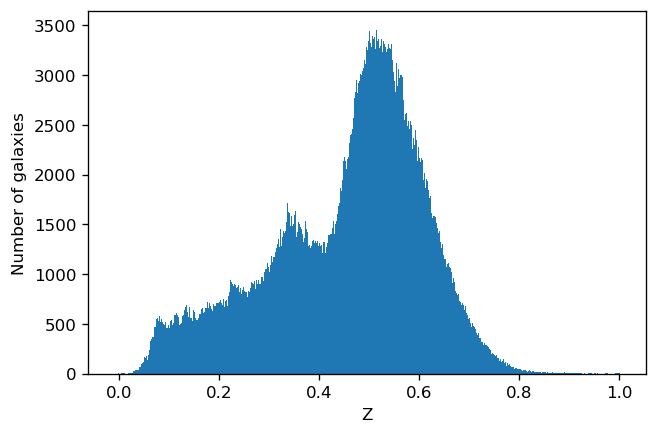

In [5]:
plt.figure(dpi = dpi)
plt.hist(df_north['Z'], bins = 1000);
plt.xlabel('Z')
plt.ylabel('Number of galaxies')
print(datetime.now())

In [6]:
df_north_pos_z = df_north[df_north['Z'] > 0]
df_north_pos_z.describe()

,RA,DEC,RUN,CAMCOL,FIELD,ID,ICHUNK,IPOLY,ISECT,AIRMASS,...,NZ,COMP,PLATE,FIBERID,MJD,FINALN,SPECTILE,ICOLLIDED,INGROUP,MULTGROUP
count,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,...,9.531930e+05,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000
mean,184.893933,28.153018,3744.575764,3.480431,190.045211,526.466500,22.121051,13685.160683,6644.178946,1.141741,...,3.469543e-04,0.987201,4730.550378,469.441076,55504.633551,22.352188,11135.269964,0.001025,94502.315741,0.846043
std,38.999948,17.995523,1299.835047,1.574764,141.917793,302.146071,10.049019,9395.851709,3555.646624,0.105763,...,2.913079e-04,0.017168,1694.391087,280.848799,1132.384028,10.054813,5279.554828,0.031999,140131.281732,0.983232
min,108.937131,-3.628120,308.000000,1.000000,11.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,2.023293e-08,0.600000,266.000000,1.000000,51581.000000,2.000000,0.000000,0.000000,-1.000000,-1.000000
25%,152.140573,13.151964,2887.000000,2.000000,86.000000,283.000000,15.000000,5269.000000,4138.000000,1.054627,...,2.396823e-04,0.973958,3962.000000,229.000000,55481.000000,15.000000,10293.000000,0.000000,6214.000000,1.000000
50%,184.639602,26.954585,3893.000000,3.000000,156.000000,504.000000,26.000000,12512.000000,6804.000000,1.123701,...,3.300774e-04,0.986072,4992.000000,451.000000,55926.000000,26.000000,13523.000000,0.000000,35616.000000,1.000000
75%,217.076180,42.384830,4670.000000,5.000000,252.000000,716.000000,31.000000,21620.000000,9101.000000,1.199153,...,4.038898e-04,1.000000,5976.000000,702.000000,56245.000000,31.000000,14678.000000,0.000000,133145.000000,1.000000
max,263.907507,68.737699,6793.000000,6.000000,872.000000,3518.000000,34.000000,32553.000000,12722.000000,1.791068,...,2.511126e-02,1.000000,7449.000000,1000.000000,56753.000000,34.000000,16027.000000,1.000000,872667.000000,15.000000


In [7]:
omega_m = 0.272            #matter density paratmeter from Komatsu et al. (2011) 
omega_l = 0.728            #vacuum density paratmeter from Komatsu et al. (2011) 

H_o = 70.4                 #Hubble constant in km s^−1 Mpc^−1 from Komatsu et al. (2011) 
c = 2.99792458e5           #speed of light in km/s 

def comov_dist_func(z):                   #comoving distance in Mpc using Eq. 4.53 in Peter (2015)
    
    a_low = 1/(1+z)
    integral_val = integrate.quad(lambda a: 1 / np.sqrt((a * omega_m) + 
                                 (a**2 * (1 - omega_m - omega_l)) + (a**4 * omega_l)), 
                                  a_low, 1)[0]
    x = (c/H_o) * integral_val
    
    return x

for z in [0, 1, 5, 10, 100, 1000, 10000]:
    print(z, comov_dist_func(z))

0 0.0
1 3341.499531443971
5 7983.314981719827
10 9721.194350150332
100 13019.32876151407
1000 14128.101155535027
10000 14480.95726974795


In [8]:
# %%time
# df_north_pos_z.insert(3, 'r_comov[Mpc]', df_north_pos_z['Z'].apply(comov_dist_func))

In [97]:

df_north_pos_z = df_north_pos_z.drop(columns=['X_comov[Mpc]', 'Y_comov[Mpc]', 'Z_comov[Mpc]'])
df_north_pos_z.insert(4, 'X_comov[Mpc]', 
                      df_north_pos_z['r_comov[Mpc]'] * 
                      np.cos(np.deg2rad(df_north_pos_z['RA'])) *
                      np.sin(np.deg2rad(df_north_pos_z['DEC'])))

df_north_pos_z.insert(5, 'Y_comov[Mpc]', 
                      df_north_pos_z['r_comov[Mpc]'] * 
                      np.sin(np.deg2rad(df_north_pos_z['RA'])) *
                      np.cos(np.deg2rad(df_north_pos_z['DEC'])))

df_north_pos_z.insert(6, 'Z_comov[Mpc]', 
                      df_north_pos_z['r_comov[Mpc]'] * 
                      np.sin(np.deg2rad(df_north_pos_z['DEC'])))

print(datetime.now())
df_north_pos_z[['RA', 'DEC', 'Z', 'r_comov[Mpc]', 'X_comov[Mpc]', 'Y_comov[Mpc]', 'Z_comov[Mpc]']].describe()

2021-07-14 12:28:43.009388


,RA,DEC,Z,r_comov[Mpc],X_comov[Mpc],Y_comov[Mpc],Z_comov[Mpc]
count,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000
mean,184.893933,28.153018,0.455101,1722.973238,-598.914823,-95.374867,770.629981
std,38.999948,17.995523,0.155186,542.633771,467.972998,900.685635,534.413927
min,108.937131,-3.628120,0.000005,0.020839,-2823.366630,-2869.954481,-169.629469
25%,152.140573,13.151964,0.352676,1387.110665,-895.251602,-780.656430,319.011132
50%,184.639602,26.954585,0.489364,1861.078447,-497.193719,-90.058189,708.617250
75%,217.076180,42.384830,0.564200,2105.790707,-220.803151,578.157392,1166.896547
max,263.907507,68.737699,1.002166,3346.908056,166.593940,2823.749805,2957.134516


In [10]:
# %%time
# df_north_pos_z[['RA', 'DEC', 'Z', 'r_comov[Mpc]', 'X_comov[Mpc]', 'Y_comov[Mpc]', 'Z_comov[Mpc]']].to_csv('Data/SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_North_Comov.csv')

In [96]:
np.cos(90)

-0.4480736161291701

In [27]:
%%time
df_north_pos_z = pd.read_csv('Data/SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_North_Comov.csv', 
                index_col = 0)
df_north_pos_z.describe()

CPU times: user 1.21 s, sys: 88.3 ms, total: 1.3 s
Wall time: 1.3 s


,RA,DEC,Z,r_comov[Mpc],X_comov[Mpc],Y_comov[Mpc],Z_comov[Mpc]
count,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000
mean,184.893933,28.153018,0.455101,1722.973238,4.975895,2.833312,-17.159951
std,38.999948,17.995523,0.155186,542.633771,904.355960,902.241366,1278.807712
min,108.937131,-3.628120,0.000005,0.020839,-3251.057124,-3192.423324,-3333.076573
25%,152.140573,13.151964,0.352676,1387.110665,-550.536942,-552.940809,-1099.575818
50%,184.639602,26.954585,0.489364,1861.078447,1.914719,0.250311,-29.268456
75%,217.076180,42.384830,0.564200,2105.790707,564.341783,559.637257,1064.095447
max,263.907507,68.737699,1.002166,3346.908056,3218.260312,3299.886398,3273.123283


In [95]:
# %matplotlib qt
# %matplotlib notebook
# %matplotlib inline
# %pylab qt
%matplotlib

fig = plt.figure(dpi = dpi)
ax = fig.add_subplot(projection='3d')

no_gal_show = 100000

ax.scatter(df_north_pos_z['X_comov[Mpc]'][0:no_gal_show], 
           df_north_pos_z['Y_comov[Mpc]'][0:no_gal_show], 
           df_north_pos_z['Z_comov[Mpc]'][0:no_gal_show],
           s = 0.1, alpha = 0.1);

ax.set_xlabel('X (Mpc/h)', labelpad = 4)
ax.set_ylabel('Y (Mpc/h)', labelpad = 8)
ax.set_zlabel('Z (Mpc/h)', labelpad = 8)

low_lim, high_lim = -3500, 3500
ax.set_xlim(low_lim, high_lim)
ax.set_ylim(low_lim, high_lim)
ax.set_zlim(low_lim, high_lim)

print(datetime.now())
plt.show()

Using matplotlib backend: Qt5Agg
2021-07-05 20:42:53.323583


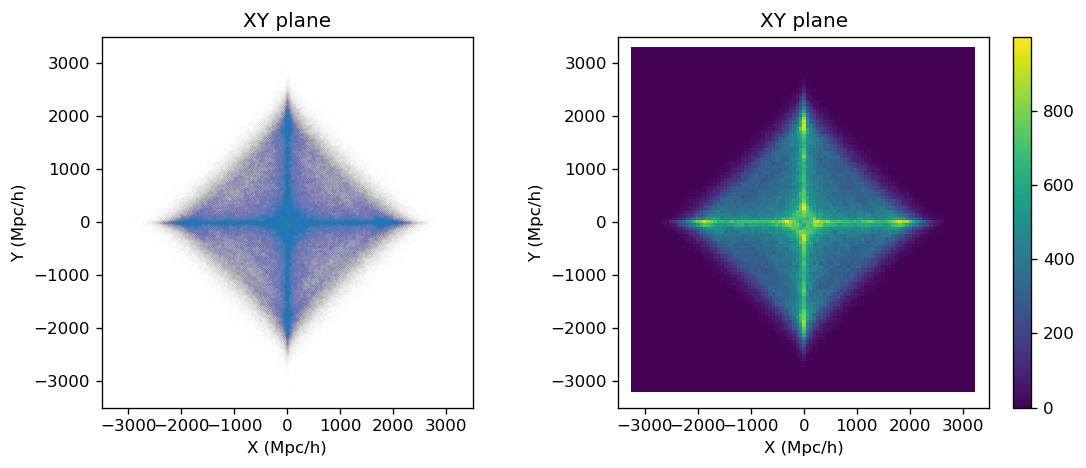

In [81]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_north_pos_z['X_comov[Mpc]'][0:no_gal_show], 
            df_north_pos_z['Y_comov[Mpc]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('X (Mpc/h)')
plt.ylabel('Y (Mpc/h)')
plt.title('XY plane');

plt.subplot(122)
plt.hist2d(df_north_pos_z['X_comov[Mpc]'][0:no_gal_show], 
           df_north_pos_z['Y_comov[Mpc]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('X (Mpc/h)')
plt.ylabel('Y (Mpc/h)')
plt.title('XY plane')
plt.colorbar()

plt.tight_layout();

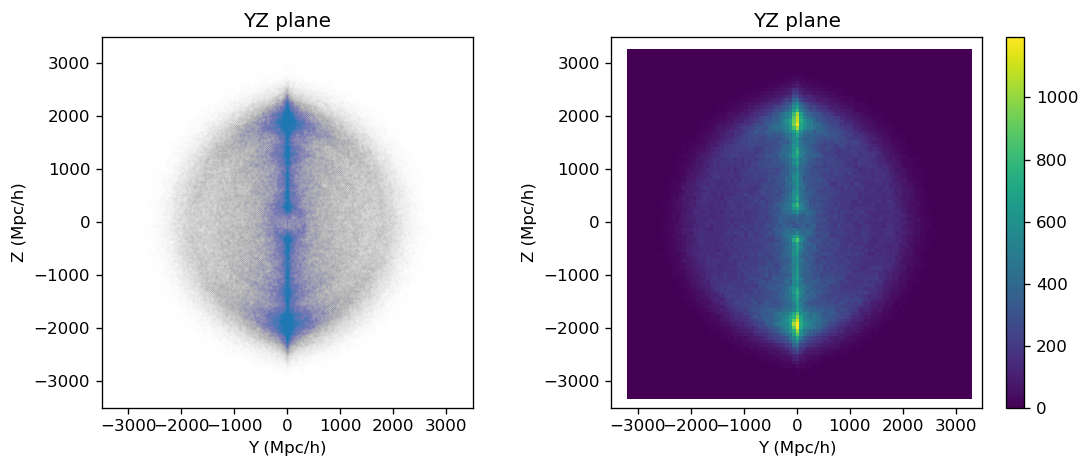

In [82]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_north_pos_z['Y_comov[Mpc]'][0:no_gal_show], 
            df_north_pos_z['Z_comov[Mpc]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Y (Mpc/h)')
plt.ylabel('Z (Mpc/h)')
plt.title('YZ plane');

plt.subplot(122)
plt.hist2d(df_north_pos_z['Y_comov[Mpc]'][0:no_gal_show], 
           df_north_pos_z['Z_comov[Mpc]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('Y (Mpc/h)')
plt.ylabel('Z (Mpc/h)')
plt.title('YZ plane')
plt.colorbar()

plt.tight_layout();

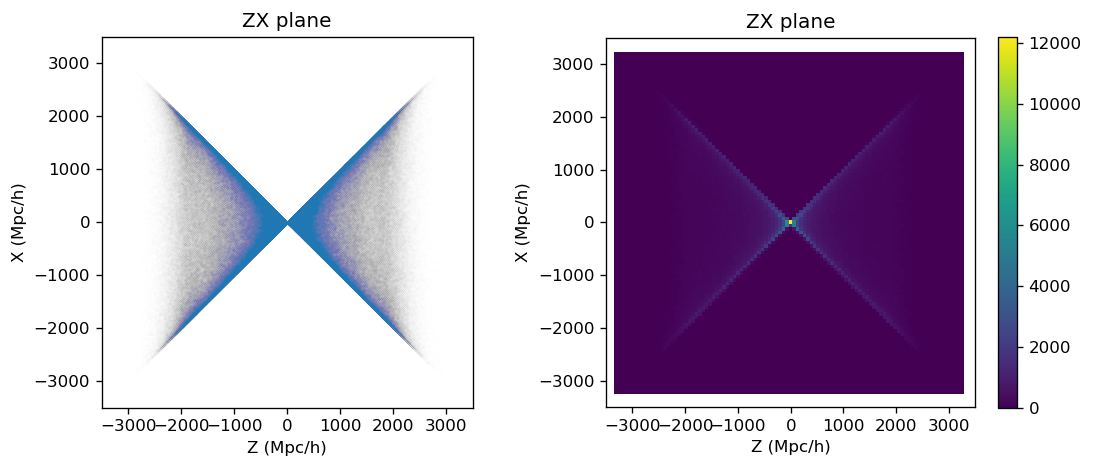

In [83]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_north_pos_z['Z_comov[Mpc]'][0:no_gal_show], 
            df_north_pos_z['X_comov[Mpc]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Z (Mpc/h)')
plt.ylabel('X (Mpc/h)')
plt.title('ZX plane');

plt.subplot(122)
plt.hist2d(df_north_pos_z['Z_comov[Mpc]'][0:no_gal_show], 
           df_north_pos_z['X_comov[Mpc]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('Z (Mpc/h)')
plt.ylabel('X (Mpc/h)')
plt.title('ZX plane')
plt.colorbar()

plt.tight_layout();